# CNNs

In this notebook you will learn how to build Convolutional Neural Networks (CNNs) for image processing.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/ageron/tf2_course/blob/master/05_cnns.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## Imports

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time

In [3]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
matplotlib 3.7.5
numpy 1.26.4
pandas 2.2.2
sklearn 1.2.2
tensorflow 2.16.1
keras._tf_keras.keras 3.3.3


In [4]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

### 1.1)
Load CIFAR10 using `keras.datasets.cifar10.load_data()`, and split it into a training set (45,000 images), a validation set (5,000 images) and a test set (10,000 images). Make sure the pixel values range from 0 to 1. Visualize a few images using `plt.imshow()`.

In [5]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train_full[:-5000] / 255
y_train = y_train_full[:-5000]
X_valid = X_train_full[-5000:] / 255
y_valid = y_train_full[-5000:]
X_test = X_test / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


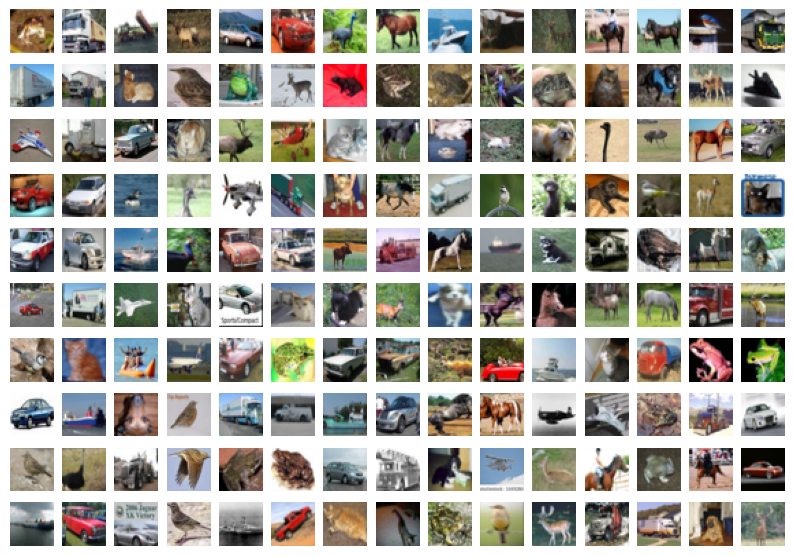

In [16]:
plt.figure(figsize=(10, 7))
n_rows, n_cols = 10, 15
for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        plt.subplot(n_rows, n_cols, i + 1)
        plt.axis("off")
        plt.imshow(X_train[i])

Let's print the classes of the images in the first row:

In [17]:
for i in range(n_cols):
    print(classes[y_train[i][0]], end=" ")

frog truck truck deer automobile automobile bird horse ship cat deer horse horse bird truck 

### 1.2)
Build and train a baseline model with a few dense layers, and plot the learning curves. Use the model's `summary()` method to count the number of parameters in this model.

**Tip**:

* Recall that to plot the learning curves, you can simply create a Pandas `DataFrame` with the `history.history` dict, then call its `plot()` method.

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(64, activation="selu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


I0000 00:00:1726047676.336314     111 service.cc:145] XLA service 0x7921f4006130 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726047676.336371     111 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 107/1407 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1472 - loss: 2.4260

I0000 00:00:1726047677.115510     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2629 - loss: 2.0343 - val_accuracy: 0.3502 - val_loss: 1.7896
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3787 - loss: 1.7372 - val_accuracy: 0.3652 - val_loss: 1.7781
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4033 - loss: 1.6598 - val_accuracy: 0.3710 - val_loss: 1.7669
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4246 - loss: 1.6095 - val_accuracy: 0.3784 - val_loss: 1.7561
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4385 - loss: 1.5657 - val_accuracy: 0.4104 - val_loss: 1.6672
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4579 - loss: 1.5256 - val_accuracy: 0.4162 - val_loss: 1.6367
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4650 - loss: 1.5022 - val_accuracy: 0.4454 - val_loss: 1.5675
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4780 - loss: 1.4698 - val_accurac

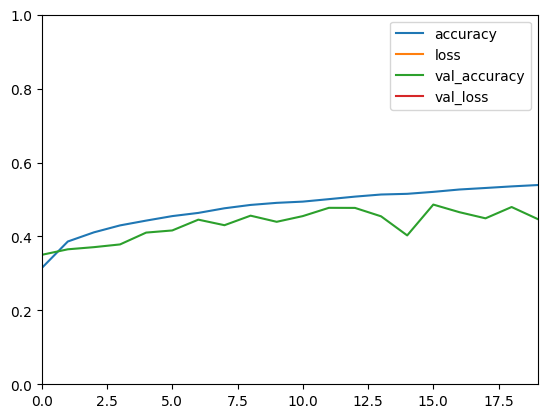

In [20]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,644 (803.30 KB)

 Trainable params: 205,642 (803.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### 1.3)
Build and train a Convolutional Neural Network using a "classical" architecture: N * (Conv2D → Conv2D → Pool2D) → Flatten → Dense → Dense. Before you print the `summary()`, try to manually calculate the number of parameters in your model's architecture, as well as the shape of the inputs and outputs of each layer. Next, plot the learning curves and compare the performance with the previous model.

In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2177 - loss: 2.1256 - val_accuracy: 0.2826 - val_loss: 2.0383
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4155 - loss: 1.6473 - val_accuracy: 0.4396 - val_loss: 1.5540
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4975 - loss: 1.4047 - val_accuracy: 0.4890 - val_loss: 1.4180
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5516 - loss: 1.2646 - val_accuracy: 0.4742 - val_loss: 1.5122
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5974 - loss: 1.1380 - val_accuracy: 0.5752 - val_loss: 1.1985
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6344 - loss: 1.0317 - val_accuracy: 0.5778 - val_loss: 1.2260
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6615 - loss: 0.9663 - val_accuracy: 0.6028 - val_loss: 1.1395
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6937 - loss: 0.8717 - 

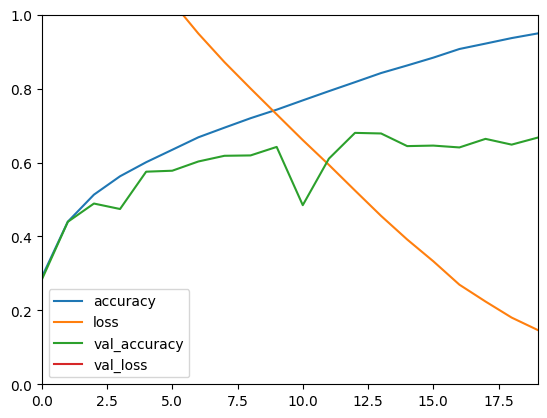

In [23]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

In [24]:
# Number of params in a convolutional layer =
# (kernel_width * kernel_height * channels_in + 1 for bias) * channels_out
(
    (3 * 3 * 3 + 1)  * 32  # in: 32x32x3   out: 32x32x32  Conv2D
  + (3 * 3 * 32 + 1) * 32  # in: 32x32x32  out: 32x32x32  Conv2D
  + 0                      # in: 32x32x32  out: 16x16x32  MaxPool2D
  + (3 * 3 * 32 + 1) * 64  # in: 16x16x32  out: 16x16x64  Conv2D
  + (3 * 3 * 64 + 1) * 64  # in: 16x16x64  out: 16x16x64  Conv2D
  + 0                      # in: 16x16x64  out: 8x8x64    MaxPool2D
  + 0                      # in: 8x8x64    out: 4096      Flatten
  + (4096 + 1) * 128       # in: 4096      out: 128       Dense
  + (128 + 1) * 10         # in: 128       out: 10        Dense
)

591274

Let's check:

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,276 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### 1.4)
Looking at the learning curves, you can see that the model is overfitting. Add a Batch Normalization layer after each convolutional layer. Compare the model's performance and learning curves with the previous model.

**Tip**: there is no need for an activation function just before the pooling layers.

In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4500 - loss: 1.5828 - val_accuracy: 0.5642 - val_loss: 1.2270
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6604 - loss: 0.9612 - val_accuracy: 0.6510 - val_loss: 1.0042
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7304 - loss: 0.7583 - val_accuracy: 0.7082 - val_loss: 0.8614
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7865 - loss: 0.6165 - val_accuracy: 0.6750 - val_loss: 0.9738
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8224 - loss: 0.5160 - val_accuracy: 0.7364 - val_loss: 0.7976
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8569 - loss: 0.4156 - val_accuracy: 0.7088 - val_loss: 0.9373
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8895 - loss: 0.3307 - val_accuracy: 0.7336 - val_loss: 0.8468
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9174 - loss: 0.2462 - 

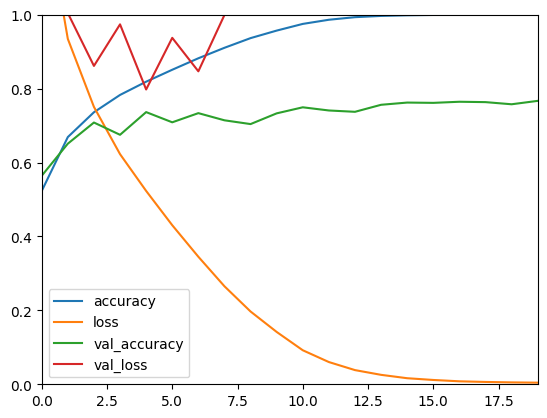

In [27]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

## Separable Convolutions

### 2.1)
Replace the `Conv2D` layers with `SeparableConv2D` layers (except the first one), fit your model and compare its performance and learning curves with the previous model.

In [28]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.SeparableConv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4047 - loss: 1.6791 - val_accuracy: 0.4962 - val_loss: 1.3831
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6267 - loss: 1.0508 - val_accuracy: 0.6336 - val_loss: 1.0367
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7056 - loss: 0.8311 - val_accuracy: 0.6882 - val_loss: 0.8978
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7515 - loss: 0.7072 - val_accuracy: 0.6864 - val_loss: 0.9048
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7860 - loss: 0.6193 - val_accuracy: 0.7228 - val_loss: 0.8276
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8163 - loss: 0.5285 - val_accuracy: 0.7300 - val_loss: 0.8225
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8455 - loss: 0.4492 - val_accuracy: 0.7318 - val_loss: 0.8407
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8726 - loss: 0.3769 -

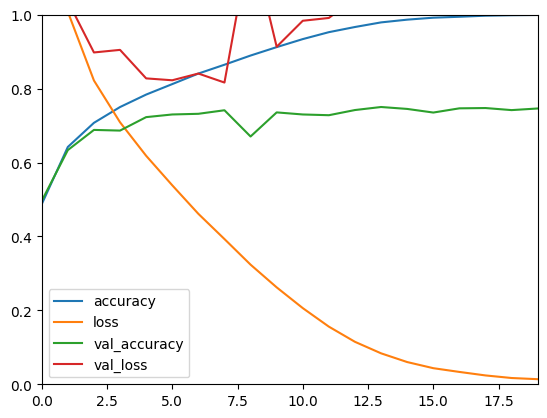

In [29]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()

### 2.2)
Try to estimate the number of parameters in your network, then check your result with `model.summary()`.

**Tip**: the batch normalization layer adds two parameters for each feature map (the scale and bias).

Let's check:

In [31]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 32, 32, 32)     │         1,344 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_1              │ (None, 16, 16, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_2              │ (None, 16, 16, 64)     │         4,736 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,852 (2.04 MB)

 Trainable params: 535,466 (2.04 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 2 (12.00 B)

## Pretrained CNNs

### 3.1)
Using `keras.preprocessing.image.load_img()` followed by `keras.preprocessing.image.img_to_array()`, load one or more images (e.g., `fig.jpg` or `ostrich.jpg` in the `images` folder). You should set `target_size=(299, 299)` when calling `load_img()`, as this is the shape that the Xception network expects.

In [27]:
img_ostrich = keras.preprocessing.image.load_img("/kaggle/input/fruits-100/train/acerola/1012.jpg", target_size=(299, 299))
img_ostrich = keras.preprocessing.image.img_to_array(img_ostrich)

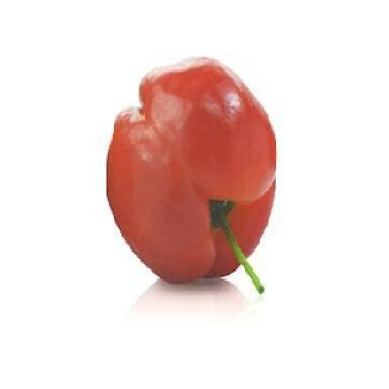

(299, 299, 3)

In [28]:
plt.imshow(img_ostrich / 255)
plt.axis("off")
plt.show()
img_ostrich.shape

### 3.2)
Create a batch containing the image(s) you just loaded, and preprocess this batch using `keras.applications.xception.preprocess_input()`. Verify that the features now vary from -1 to 1: this is what the Xception network expects.

In [29]:
X_batch = np.array([img_fig, img_ostrich])
X_preproc = keras.applications.xception.preprocess_input(X_batch)

In [30]:
X_preproc.min(), X_preproc.max()

(-1.0, 1.0)

### 3.3)
Create an instance of the Xception model (`keras.applications.xception.Xception`) and use its `predict()` method to classify the images in the batch. You can use `keras.applications.resnet50.decode_predictions()` to convert the output matrix into a list of top-N predictions (with their corresponding class labels).

In [31]:
model = keras.applications.xception.Xception()
Y_proba = model.predict(X_preproc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [32]:
Y_proba.shape

(2, 1000)

In [33]:
np.argmax(Y_proba, axis=1)

array([989, 945])

In [34]:
decoded_predictions = keras.applications.resnet50.decode_predictions(Y_proba)
for preds in decoded_predictions:
    for wordnet_id, name, proba in preds:
        print("{} ({}): {:.1f}%".format(name, wordnet_id, 100 * proba))
    print()

hip (n12620546): 63.6%
strawberry (n07745940): 12.1%
buckeye (n12768682): 5.1%
pomegranate (n07768694): 2.8%
bell_pepper (n07720875): 2.2%

bell_pepper (n07720875): 88.4%
hip (n12620546): 1.5%
lemon (n07749582): 1.5%
orange (n07747607): 0.7%
dumbbell (n03255030): 0.2%



## Data Augmentation and Transfer Learning
In this exercise you will reuse a pretrained Xception model to build a flower classifier.

First, let's download the dataset:

In [35]:
import tensorflow as tf
from tensorflow import keras
import os

flowers_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
flowers_path = keras.utils.get_file("flowers.tgz", flowers_url, extract=True)
flowers_dir = os.path.join(os.path.dirname(flowers_path), "flower_photos")

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [36]:
for root, subdirs, files in os.walk(flowers_dir):
    print(root)
    for filename in files[:3]:
        print("   ", filename)
    if len(files) > 3:
        print("    ...")

/root/.keras/datasets/flower_photos
    LICENSE.txt
/root/.keras/datasets/flower_photos/roses
    1562198683_8cd8cb5876_n.jpg
    3663244576_97f595cf4a.jpg
    5249439791_196b4e7fc7.jpg
    ...
/root/.keras/datasets/flower_photos/dandelion
    1241011700_261ae180ca.jpg
    3696596109_4c4419128a_m.jpg
    8979087213_28f572174c.jpg
    ...
/root/.keras/datasets/flower_photos/sunflowers
    200557981_f800fa1af9.jpg
    3883895985_bd20198371.jpg
    6053739964_a1d9ab3ed1_n.jpg
    ...
/root/.keras/datasets/flower_photos/daisy
    14087947408_9779257411_n.jpg
    7633425046_8293e3d0e9_m.jpg
    7227973870_806d9d3e42_n.jpg
    ...
/root/.keras/datasets/flower_photos/tulips
    8712230357_1298b8513b.jpg
    14025589299_eac64c51af_m.jpg
    13530796853_e5993f57d6_n.jpg
    ...


### 4.1)
Build a `keras.preprocessing.image.ImageDataGenerator` that will preprocess the images and do some data augmentation (the [documentation](https://keras.io/preprocessing/image/) contains useful examples):

* It should at least perform horizontal flips and keep 10% of the data for validation, but you may also make it perform a bit of rotation, rescaling, etc.
* Also make sure to apply the Xception preprocessing function (using the `preprocessing_function` argument).
* Call this generator's `flow_from_directory()` method to get an iterator that will load and preprocess the flower photos from the `flower_photos` directory, setting the target size to (299, 299) and `subset` to `"training"`.
* Call this method again with the same parameters except `subset="validation"` to get a second iterator for validation.
* Get the next batch from the validation iterator and display the first image from the batch.

In [37]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1,
    preprocessing_function=keras.applications.xception.preprocess_input)

train_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="training")

valid_generator = datagen.flow_from_directory(
        flowers_dir,
        target_size=(299, 299),
        batch_size=32,
        subset="validation")

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


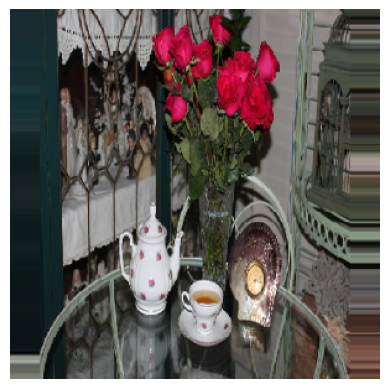

In [38]:
X_batch, y_batch = next(valid_generator)
plt.imshow((X_batch[0] + 1)/2)
plt.axis("off")
plt.show()

### 4.2)
Now let's build the model:
* Create a new `Xception` model, but this time set `include_top=False` to get the model without the top layer. **Tip**: you will need to access its `input` and `output` properties.
* Make all its layers non-trainable.
* Using the functional API, add a `GlobalAveragePooling2D` layer (feeding it the Xception model's output), and add a `Dense` layer with 5 neurons and the Softmax activation function.
* Compile the model. **Tip**: don't forget to add the `"accuracy"` metric.
* Fit your model using `fit_generator()`, passing it the training and validation iterators (and setting `steps_per_epoch` and `validation_steps` appropriately).

In [39]:
n_classes = 5

base_model = keras.applications.xception.Xception(include_top=False)

for layer in base_model.layers:
    layer.trainable = False

global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)
predictions = keras.layers.Dense(n_classes, activation='softmax')(global_pool)

model = keras.models.Model(base_model.input, predictions)

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=3306 // 32,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=364 // 32)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


103/103 ━━━━━━━━━━━━━━━━━━━━ 99s 832ms/step - accuracy: 0.2630 - loss: 1.5939 - val_accuracy: 0.4574 - val_loss: 1.4836
Epoch 2/50
  1/103 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.4375 - loss: 1.4597

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.4375 - loss: 1.4597 - val_accuracy: 0.1667 - val_loss: 1.6810
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 79s 719ms/step - accuracy: 0.4933 - loss: 1.4414 - val_accuracy: 0.5710 - val_loss: 1.3585
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - accuracy: 0.7500 - loss: 1.2789 - val_accuracy: 0.5000 - val_loss: 1.3823
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 78s 713ms/step - accuracy: 0.6343 - loss: 1.3169 - val_accuracy: 0.6250 - val_loss: 1.2629
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.5625 - loss: 1.3178 - val_accuracy: 0.6667 - val_loss: 1.2726
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 78s 713ms/step - accuracy: 0.6825 - loss: 1.2162 - val_accuracy: 0.6761 - val_loss: 1.1917
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.7500 - loss: 1.1834 - val_accuracy: 0.6667 - val_loss: 1.1758
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 75s 685ms/step - accuracy: 0.7285 - loss: 1.1268 - val_accu

In [ ]:
pd.DataFrame(history.history).plot()
plt.axis([0, 19, 0, 1])
plt.show()